Can we estimate the supply curves for different types of real-estates over geographical areas?

<span style="font-size: 30px;">Introduction:</span>

<span style="font-size: 30px;">Data Cleaning/Loading:</span>

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#read dataset and convert into a dataframe object
realtor= pd.read_csv("realtor-data.csv")
df=realtor.copy()

There are two steps to clean the data, being removing houses that are currently listed as "ready to build" instead of on the market, as the reported information about them is significantly more speculative, and then adding a dummy variable representing if the house has been sold before. The first step will allow for more conclusive results to the study, and will not significantly impact the amount of data available the analyze. The second step will help us create figures and histograms later within the paper. 

In [9]:
#Removing houses not yet on the market
df.drop(df[df["status"] == "ready_to_build"].index, inplace=True)
df.drop(columns="status", inplace=True)

#Adding a dummy variable representing if a house has been sold before
df["sold_before"]=np.where(df.prev_sold_date.isnull(),0,1)

This is what the dataset currently looks like:

In [10]:
#inspect dataset
df.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,sold_before
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,0


<span style="font-size: 30px;">Summary Statistics Tables:</span>

In [11]:
#printing summary statistics for numerical columns
summary_stats = df.describe().T
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
bed,1182606.0,3.393161,2.053180e+00,1.0,2.00,3.00,4.00,123.0
bath,1206853.0,2.487426,1.873599e+00,1.0,2.00,2.00,3.00,198.0
acre_lot,1043599.0,32.150131,1.249983e+03,0.0,0.12,0.32,1.34,100000.0
zip_code,1398655.0,8359.087318,4.129099e+03,601.0,5655.00,8759.00,11426.00,99999.0
house_size,949022.0,2177.853815,3.495979e+03,4.0,1168.00,1700.00,2500.00,1450112.0
price,1399097.0,818471.244103,2.684814e+06,0.0,235000.00,445000.00,795000.00,875000000.0
sold_before,1399134.0,0.510868,4.998820e-01,0.0,0.00,1.00,1.00,1.0


This summary statistics table displays several interesting and important qualities of the data. Firstly, these data have several extreme outliers. This can be seen in the large disparity between the 75th and max values for the bath, bed, acre_lot, price, and house_size variables. These outliers are significantly larger than all other entried, and thus therefore could potentially impact the conclusions of the study. These outliers are an intesting set of data by their own right, and could potentially represent an opportunity to investigate trends in the high-end and multi-residential real estate market, but given the target of this specific study is a traditional American home-buyer, the dataframe object will be edited to remove siginificant outliers in these variables. 

The metric used to determine an extreme outlier within this dataset will be the interquartile range (IQR). An 'extreme outlier' in this paper represents a datapoint with a value for any of the afforementioned 5 variables that surprasses 3 times the IQR from the 25th and 75th percentile values for that variable.

<span style="font-size: 30px;">Plots, Histograms, Figures:</span>

Given that the main depended variable that this paper aims to model is the 

Text(0.5, 0, 'Price (millions USD)')

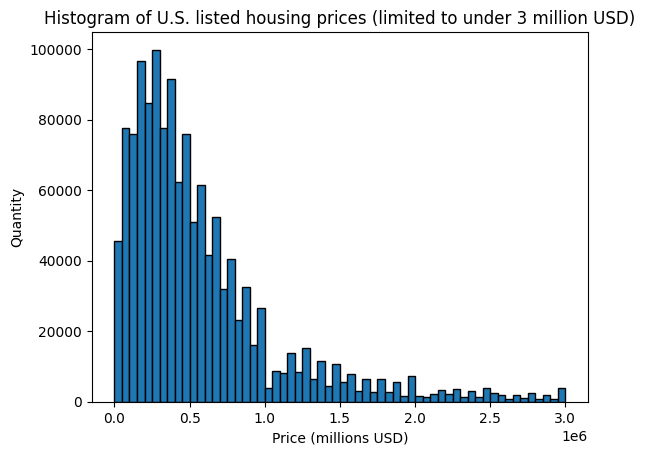

In [12]:
#plotting histagram for price variable
filtered_price = df["price"][df["price"] < 3000000]
plt.hist(filtered_price,bins=60,edgecolor='black')
plt.title("Histogram of U.S. listed housing prices (limited to under 3 million USD)")
plt.ylabel("Quantity")
plt.xlabel("Price (millions USD)")

THis histogram displays the distribution of U.S. listed house prices. An interesting finding of this histogram is the clear jumps at every $50,000 USD. This could be due to real-estate sellers preferring round numbers when listing houses.

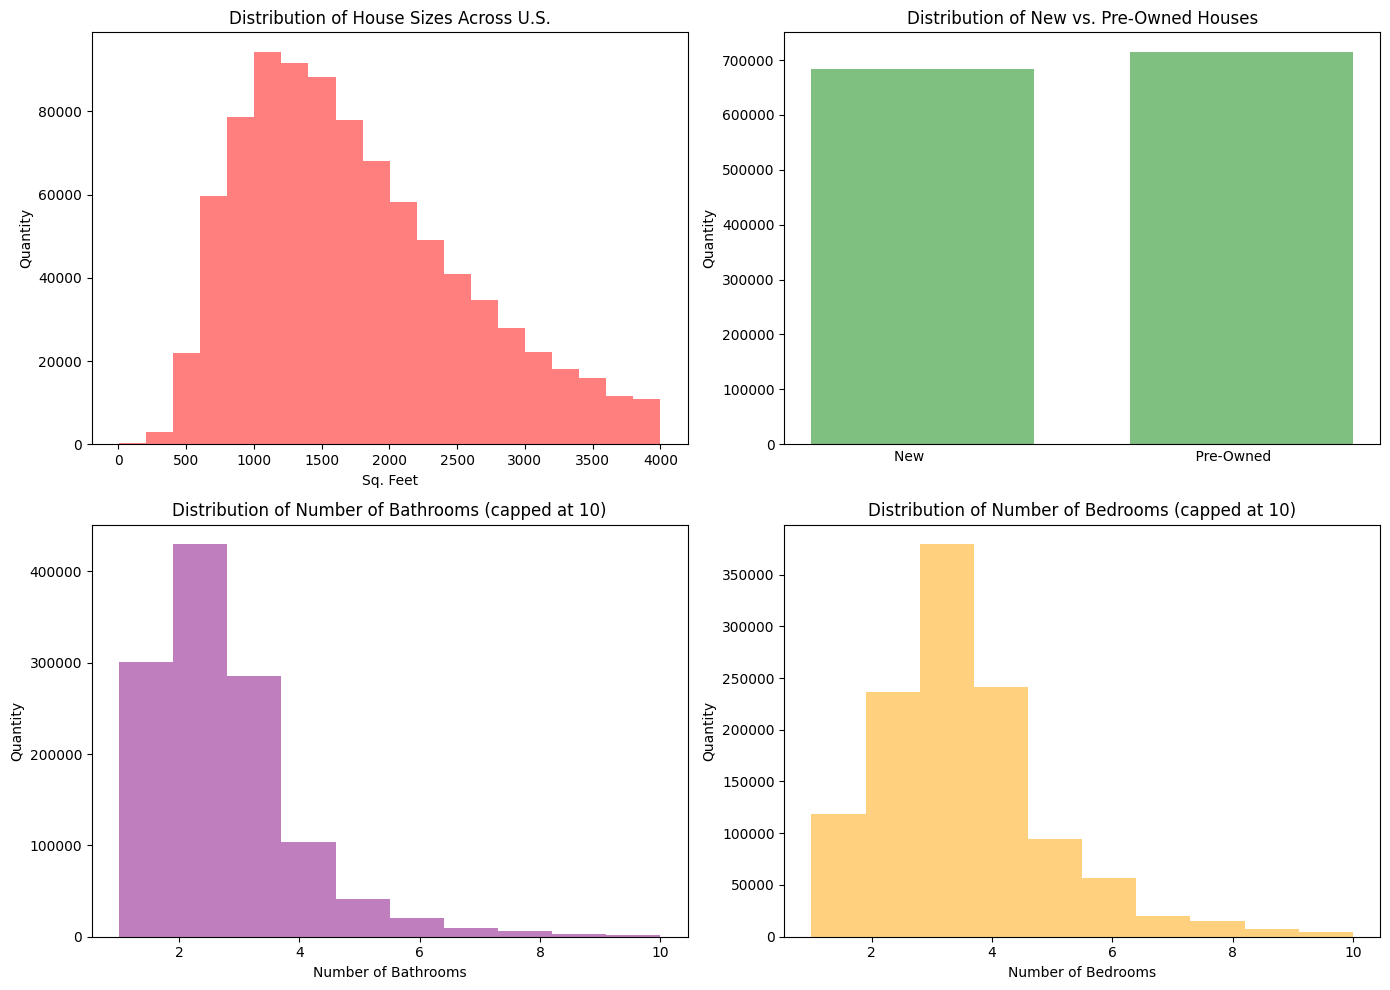

In [52]:
fig, fig_1 = plt.subplots(2,2,figsize=(14,10))

#plotting histogram for house_size
reasonable_homes = df['house_size'][df['house_size'] <= 4000]
fig_1[0,0].hist(reasonable_homes, bins=20, color="red", alpha=0.5)
fig_1[0,0].set_title("Distribution of House Sizes Across U.S.")
fig_1[0,0].set_xlabel('Sq. Feet')
fig_1[0,0].set_ylabel('Quantity')

#plotting histogram for sold_before 
fig_1[0,1].hist(df["sold_before"], bins=2, color="green", alpha=0.5, rwidth=0.7, align='mid')
fig_1[0,1].set_title("Distribution of New vs. Pre-Owned Houses")
#customising x-axis for dummy
fig_1[0,1].set_xticks([])
fig_1[0,1].set_xlabel('New                                                              Pre-Owned')
fig_1[0,1].set_ylabel('Quantity')

#plotting histogram for # of baths, limited to 10 baths to restrict apartments from being on list
baths_singlefamily = df["bath"][df["bath"] <= 10]
fig_1[1,0].hist(baths_singlefamily, bins=10, color="purple", alpha=0.5)
fig_1[1,0].set_title("Distribution of Number of Bathrooms (capped at 10)")
fig_1[1,0].set_xlabel('Number of Bathrooms')
fig_1[1,0].set_ylabel('Quantity')

#plotting histogram for # of bedrooms, limited to 10 baths to restrict apartments from being on list
beds_singlefamily = df["bed"][df["bed"] <= 10]
fig_1[1,1].hist(beds_singlefamily, bins=10, color="orange", alpha=0.5)
fig_1[1,1].set_title("Distribution of Number of Bedrooms (capped at 10)")
fig_1[1,1].set_xlabel('Number of Bedrooms')
fig_1[1,1].set_ylabel('Quantity')

plt.tight_layout()

<span style="font-size: 30px;">Conclusion:</span>